In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cufflinks as cf
import regex as re
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
sns.set()

In [2]:
init_notebook_mode(connected=True)

In [3]:
cf.go_offline()

## First look to the data

In [4]:
df = pd.read_excel('data/flats.xlsx')

In [5]:
df.head()

page_no  page_order          id                               name   
0       48           0    62441036      Prodej bytu 2+kk 112m² (Loft)  \
1       48           1  2050999628             Prodej bytu 3+kk 102m²   
2       48           2  2185217356              Prodej bytu 1+kk 46m²   
3       48           3  1128252748              Prodej bytu 2+kk 65m²   
4       48           4   544814924  Prodej bytu 6 pokojů a více 224m²   

                                                link   
0  http://sreality.cz//detail/prodej/byt/2+kk/pra...  \
1  http://sreality.cz//detail/prodej/byt/3+kk/pra...   
2  http://sreality.cz//detail/prodej/byt/1+kk/pra...   
3  http://sreality.cz//detail/prodej/byt/2+kk/pra...   
4  http://sreality.cz//detail/prodej/byt/6-a-vice...   

                               locality             price  
0  Jindřicha Plachty, Praha 5 - Smíchov  Info o ceně u RK  
1                  Na vysoké I, Praha 5        18749700Kč  
2     Wiedermannova, Praha 5 - Stodůlky         5490000Kč  
3                  Na vysoké I, Praha 5        10680720Kč  
4         Hálkova, Praha 2 - Nové Město        19990000Kč

## Data cleaning 

### Get city from locality column

In [6]:
def get_city(x):
    search = re.search('(Praha\s*\d*)', x, re.IGNORECASE)
    
    if search:
        city = search.group(1)
        return city.strip()
    else:
        return np.nan

In [7]:
df['city'] = df['locality'].apply(get_city)

In [8]:
df['city'].unique()

array(['Praha 5', 'Praha 2', 'Praha 10', 'Praha 9', 'Praha', 'Praha 3',
       'Praha 4', 'Praha 8', 'Praha 6', 'Praha 1', 'Praha 7'],
      dtype=object)

In [9]:
df[pd.isnull(df['city'])]

Empty DataFrame
Columns: [page_no, page_order, id, name, link, locality, price, city]
Index: []

### Get price_num

In [10]:
df['price_num'] = df['price'].str.replace('Kč','')
df['price_num'] = df['price_num'].replace('Info o ceně u RK', np.nan)
df['price_num'] = df['price_num'].replace('Info o ceně na dotaz', np.nan)
df['price_num'] = pd.to_numeric(df['price_num'])

In [11]:
df['price_num']

0              NaN
1       18749700.0
2        5490000.0
3       10680720.0
4       19990000.0
           ...    
4650    10900000.0
4651     8755000.0
4652     6500000.0
4653     8590000.0
4654     8990000.0
Name: price_num, Length: 4655, dtype: float64

In [12]:
df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4655 entries, 0 to 4654
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
4655 non-null   object
dtypes: object(1)
memory usage: 36.5+ KB


### Get rooms 

In [13]:
def get_rooms(x):
    search = re.search('Prodej bytu (\d((\+1)|(\+kk))?)\D*(\d+)m²', x, re.IGNORECASE)
    
    if search:
        rooms = search.group(1)
        return rooms
    else:
        return np.nan

In [14]:
df['rooms'] = df['name'].apply(get_rooms)

In [15]:
df['rooms']

0       2+kk
1       3+kk
2       1+kk
3       2+kk
4          6
        ... 
4650    3+kk
4651    3+kk
4652    2+kk
4653    2+kk
4654    3+kk
Name: rooms, Length: 4655, dtype: object

In [16]:
df[df['rooms'].isna()]['name'].unique()

array(['Prodej bytu atypické 41m²',
       'Prodej bytu atypické 48m² (Podkrovní)',
       'Prodej bytu atypické 190m² (Mezonet)',
       'Prodej bytu atypické 128m²', 'Prodej bytu atypické 124m² (Loft)',
       'Prodej bytu atypické 126m² (Podkrovní)',
       'Dražba bytu 3+1100m² (Mezonet)',
       'Prodej bytu atypické 250m² (Mezonet)',
       'Prodej bytu atypické 39m²', 'Dražba bytu 3+kk 57m²',
       'Prodej bytu atypické 139m² (Mezonet)',
       'Prodej bytu atypické 191m²', 'Dražba bytu 2+139m²',
       'Prodej bytu atypické 203m² (Loft)', 'Prodej bytu atypické 40m²',
       'Prodej bytu atypické 97m² (Mezonet)', 'Dražba bytu 2+157m²',
       'Prodej bytu atypické 29m² (Podkrovní)',
       'Prodej bytu atypické 288m² (Loft)', 'Dražba bytu 2+kk 37m²',
       'Prodej bytu atypické 500m²', 'Prodej bytu atypické 49m²',
       'Dražba bytu 3+162m²', 'Prodej podílu 1/2 bytu 2+166m²',
       'Prodej bytu atypické 72m² (Podkrovní)',
       'Prodej bytu atypické 125m²', 'Prodej bytu aty

It is possible to extract flat type "atypicke".

### Get size 

In [17]:
def get_size(x):
    search = re.search('Prodej bytu (\d((\+1)|(\+kk))?)\D*(\d+)m²', x, re.IGNORECASE)
    
    if search:
        size = search.group(5)
        return size
    else:
        return np.nan

In [18]:
df['size'] = pd.to_numeric(df['name'].apply(get_size))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4655 entries, 0 to 4654
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   page_no     4655 non-null   int64  
 1   page_order  4655 non-null   int64  
 2   id          4655 non-null   int64  
 3   name        4655 non-null   object 
 4   link        4655 non-null   object 
 5   locality    4655 non-null   object 
 6   price       4655 non-null   object 
 7   city        4655 non-null   object 
 8   price_num   4429 non-null   float64
 9   rooms       4572 non-null   object 
 10  size        4572 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 400.2+ KB


## Data visualization 

### City

In [20]:
df.iplot(kind='scatter', x='city', y='price_num', mode='markers', size=10)

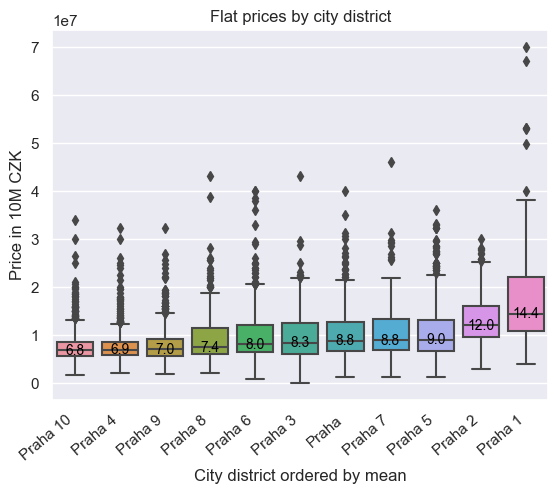

In [21]:
#calculate median price by city
median_by_city = df.groupby(['city'])['price_num'].median().sort_values(ascending=True)

#create boxplots ordered by median price (ascending)
box_plot =sns.boxplot(x='city', y='price_num', data=df, order=median_by_city.index)

#get median labels to the boxes
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0], 1)

    ax.text(
        cat, 
        y, 
        f'{round(y*0.000001,1)}', 
        ha='center', 
        va='center', 
        fontweight='normal', 
        size=10,
        color='black')



box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=40, ha="right")
box_plot.set_title('Flat prices by city district')
box_plot.set_ylabel('Price in 10M CZK')
box_plot.set_xlabel('City district ordered by mean');


Plot shows that most expensive flats are in Prague 1 with median 14,4M CZK - 50% of flats (without outliers) are in price range between 10,8M CZK and 22M CZK, lowest prices are in Prague 10 with median 6,8M CZK - 50% of flats (without outliers) are in price range between 5,5M CZK and 8,6M CZK.  

In [22]:
# plotly interactive version
fig = px.box(df, x='city', y='price_num')
fig.show()

## Rooms

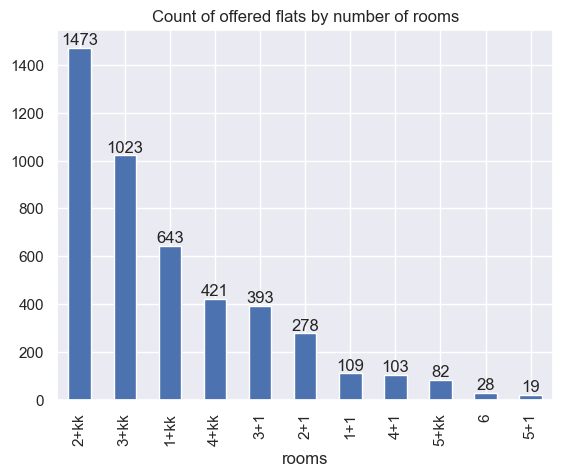

In [23]:
ax = df['rooms'].value_counts().plot(kind='bar', title='Count of offered flats by number of rooms')
ax.bar_label(ax.containers[0]);

The most offered type of flat is 2+kk.

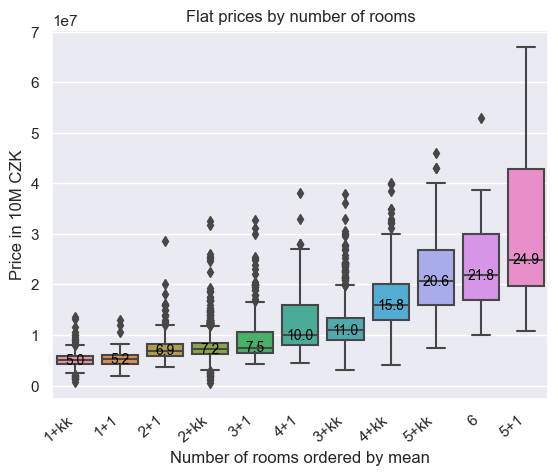

In [24]:
#calculate median price by flat type
median_by_rooms = df.groupby(['rooms'])['price_num'].median().sort_values(ascending=True)

#create boxplots ordered by median price (ascending)
box_plot =sns.boxplot(x='rooms', y='price_num', data=df, order=median_by_rooms.index)

#get median labels to the boxes
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1)

    ax.text(
        cat, 
        y, 
        f'{round(y*0.000001,1)}', 
        ha='center', 
        va='center', 
        fontweight='normal', 
        size=10,
        color='black')

box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=40, ha="right")


box_plot.set_title('Flat prices by number of rooms')
box_plot.set_ylabel('Price in 10M CZK')
box_plot.set_xlabel('Number of rooms ordered by mean');


There are smaller price differences between 1+1 and 1+kk, 2+1 and 2+kk flats than differences between +1 and +kk in bigger flats. The most expensive is 5+1 type of flats with median 24,9M CZK - 50% of flats (without outliers) are in price range between 19,6M CZK and 46,3M CZK.

In [25]:
fig = px.box(df,x='rooms', y='price_num')
fig.show()

### Size

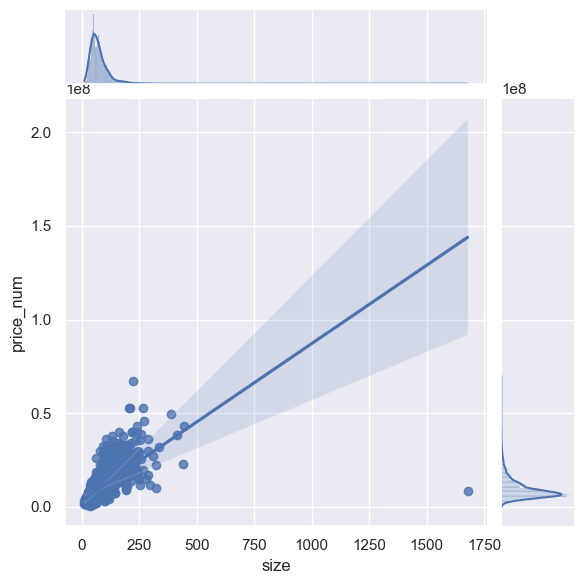

In [26]:
sns.jointplot(data=df, x='size', y='price_num', kind='reg');

Combined distribution of flat sizes and flat prices. Scatter plot with linear fit shows that the price increases in proportion to the size. There is one outlier flat with size: 1678m2, which will be removed for more proper results. 

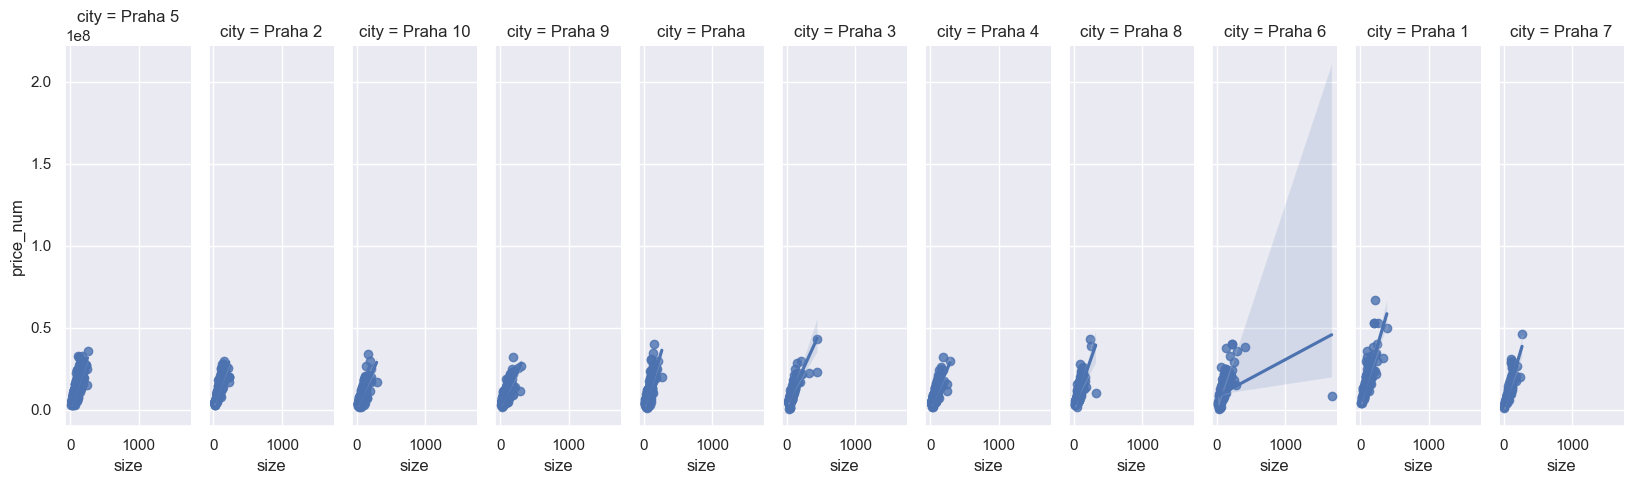

In [27]:
sns.lmplot(data=df, x='size', y='price_num', col='city', aspect=0.3, height=5);

Linear model of flat size vs price according city district showing that model of Prague 6 has quide wide confidence interval because of mentioned outlier.

In [28]:
df.nlargest(1, 'size')

page_no  page_order          id                     name   
3127        4          16  1860486476  Prodej bytu 2+kk 1678m²  \

                                                   link   
3127  http://sreality.cz//detail/prodej/byt/2+kk/pra...  \

                        locality      price     city  price_num rooms    size  
3127  Žalanského, Praha 6 - Řepy  8350000Kč  Praha 6  8350000.0  2+kk  1678.0

In [29]:
df2 = df.drop(labels=3127, axis=0)

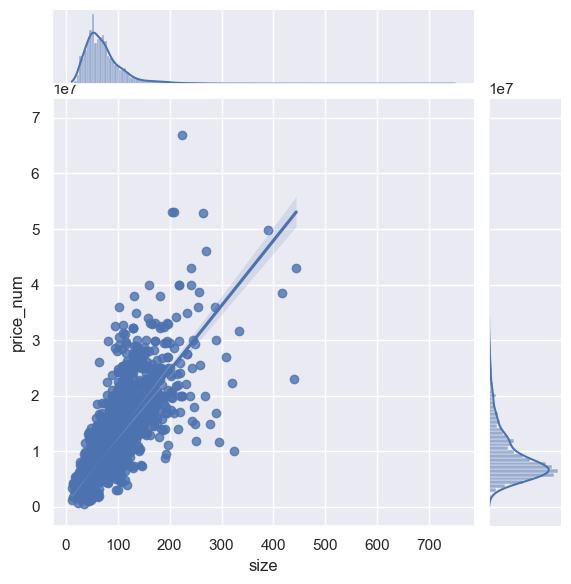

In [30]:
sns.jointplot(data=df2, x='size', y='price_num', kind='reg');

Plot shows positive correlation between size and price of flat. Removing of outlier improve linear model and decrease confidence interval - 95% of estimate will fall in to this interval. 

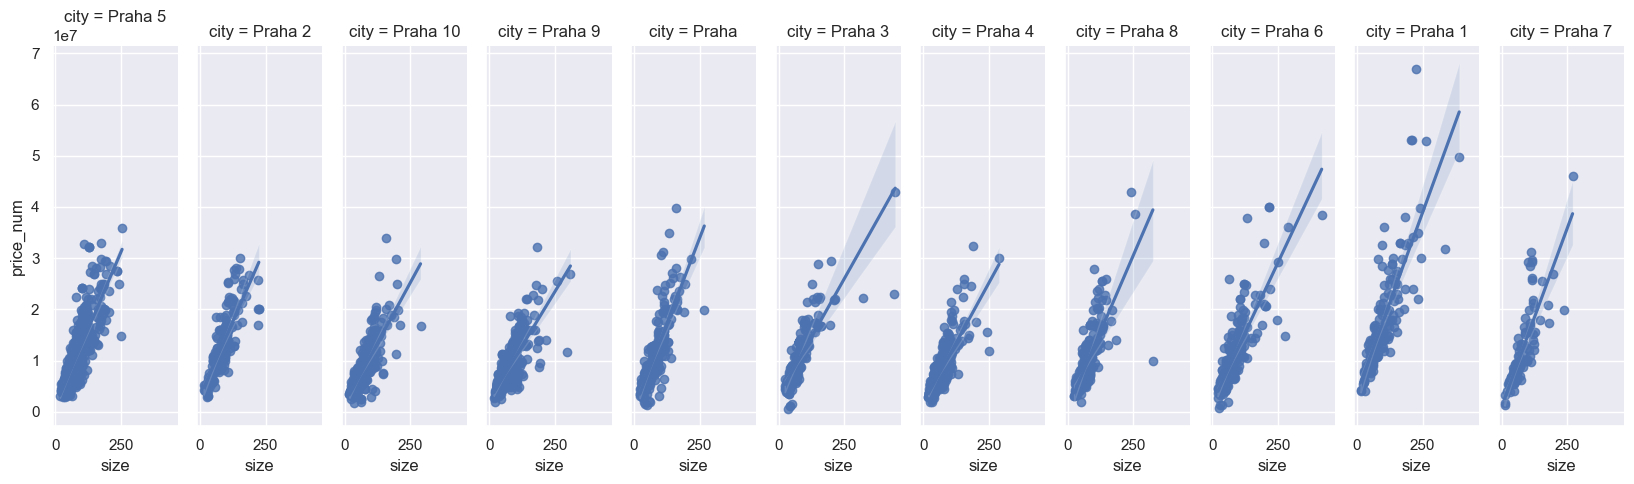

In [31]:
sns.lmplot(data=df2, x='size', y='price_num', col='city', aspect=0.3, height=5);

Better result for Prague 6 after removing outlier

In [32]:
df.iplot(kind='line', x='size', y='price_num', mode='markers');

Interactive scatter plot showing positive correlation between size and price of the flat.

### Room prices

In [33]:
df['room_price'] = df['rooms'].str.replace('+kk','')
df['room_price'] = df['room_price'].str.replace('+1','')
df['room_price'] = pd.to_numeric(df['room_price'])

In [34]:
df['room_price']=df['price_num']/df['room_price']

In [35]:
df['room_price'].head()

0             NaN
1    6.249900e+06
2    5.490000e+06
3    5.340360e+06
4    3.331667e+06
Name: room_price, dtype: float64

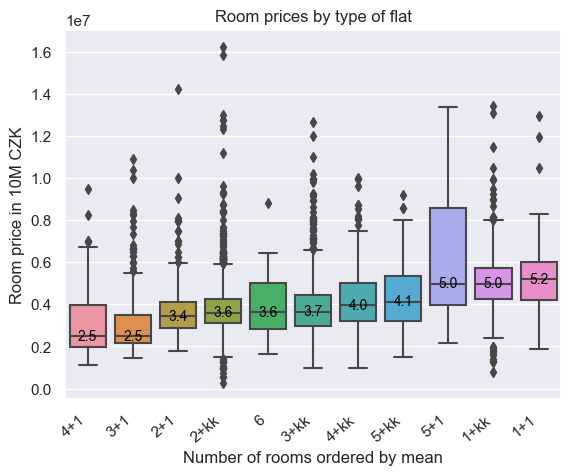

In [36]:
#calculate median room price by type of flat
median_by_rooms = df.groupby(['rooms'])['room_price'].median().sort_values(ascending=True)

#create boxplots ordered by median room price (ascending)
box_plot =sns.boxplot(x='rooms', y='room_price', data=df, order=median_by_rooms.index)

#get median labels to the boxes
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1)

    ax.text(
        cat, 
        y, 
        f'{round(y*0.000001,1)}', 
        ha='center', 
        va='center', 
        fontweight='normal', 
        size=10,
        color='black')

box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=40, ha="right")


box_plot.set_title('Room prices by type of flat')
box_plot.set_ylabel('Room price in 10M CZK')
box_plot.set_xlabel('Number of rooms ordered by mean');


The smallest flats (1+1 and 1+kk) have the highest price per room with median around 5M CZK. The room in 5+1 flats is one of the most expensive with quite big spred of values between 1st and 3rd quartile.

### kk vs +1 

In [37]:
def get_kk(x):
    search = re.search('Prodej bytu (\d((\+1)|(\+kk))?)\D*(\d+)m²', x, re.IGNORECASE)
    
    if search:
        rooms = search.group(2)
        return rooms
    else:
        return np.nan

In [38]:
df['kk_vs_1'] = df['name'].apply(get_kk)
df[df['kk_vs_1']=='+1'].count()

page_no       902
page_order    902
id            902
name          902
link          902
locality      902
price         902
city          902
price_num     852
rooms         902
size          902
room_price    852
kk_vs_1       902
dtype: int64

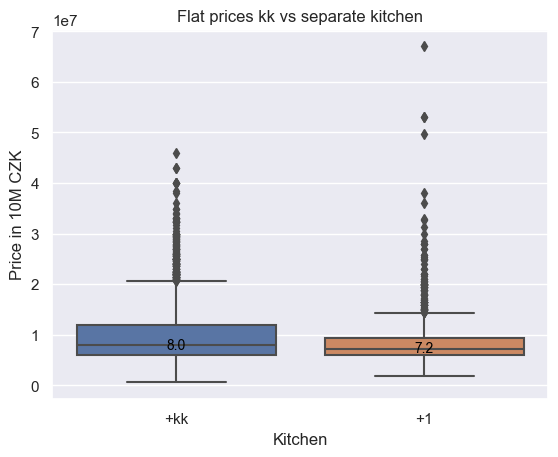

In [39]:
box_plot =sns.boxplot(x='kk_vs_1', y='price_num', data=df)

#get median labels to the boxes
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1)

    ax.text(
        cat, 
        y, 
        f'{round(y*0.000001,1)}', 
        ha='center', 
        va='center', 
        fontweight='normal', 
        size=10,
        color='black')

box_plot.set_title('Flat prices kk vs separate kitchen')
box_plot.set_ylabel('Price in 10M CZK')
box_plot.set_xlabel('Kitchen');

Price of the flat is smaller in case of separate kitchen.